In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import roc_curve, roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

Using TensorFlow backend.


In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data['customerID'].nunique()

7043

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
data['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
data['Churn'].unique()

array([0, 1], dtype=int64)

In [11]:
pd.to_numeric(data['MonthlyCharges'], errors='coerce').notnull().all()

True

In [12]:
pd.to_numeric(data['TotalCharges'], errors='coerce').notnull().all()

False

In [13]:
data['TotalCharges'].replace(' ', 0, inplace=True)

In [14]:
pd.to_numeric(data['TotalCharges'], errors='coerce').notnull().all()

True

In [15]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'].dtype

dtype('float64')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
numerical = [var for var in data.columns if data[var].dtypes != 'O' and var not in ['Churn', 'SeniorCitizen']]
data[numerical].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [18]:
categorical = [var for var in data.columns if data[var].dtypes == 'O' and var not in numerical]
data[categorical].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [19]:
data[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [20]:
data[numerical].nunique()

tenure              73
MonthlyCharges    1585
TotalCharges      6531
dtype: int64

In [21]:
discrete = []

for var in numerical:
    if data[var].nunique() < 100:
        discrete.append(var)
discrete

['tenure']

In [22]:
numerical = [var for var in numerical if var not in discrete]
numerical

['MonthlyCharges', 'TotalCharges']

In [23]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

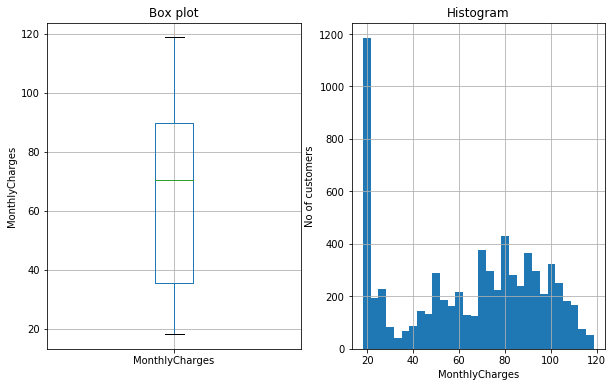

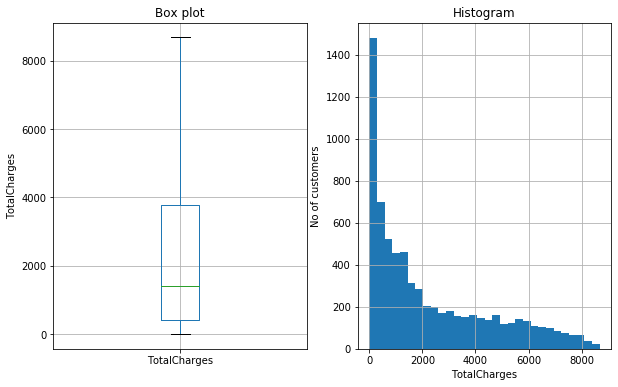

In [24]:
for var in numerical:
    plt.figure(figsize = (10, 6))
    
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('Box plot')    
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=30)
    fig.set_title('Histogram')
    fig.set_xlabel(var)
    fig.set_ylabel('No of customers')
    
    plt.show()

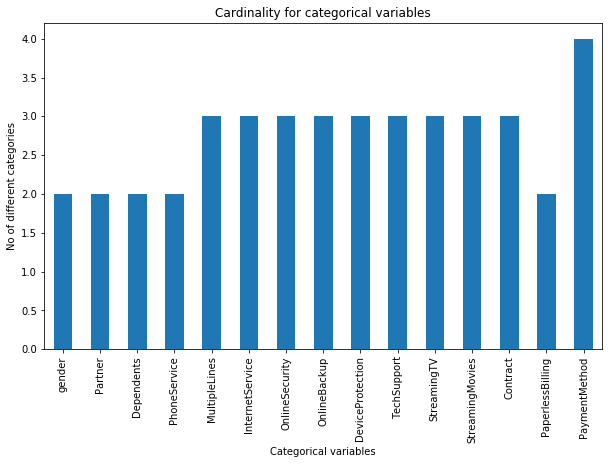

In [25]:
data[categorical].nunique().plot.bar(figsize=(10, 6))
plt.title('Cardinality for categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('No of different categories')
plt.show()

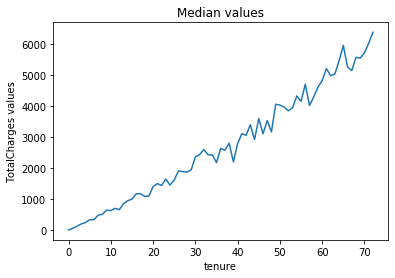

In [26]:
#Perform median plot, 5% categorical variable distribution, etc.
for var in discrete:
    data.groupby(var)['TotalCharges'].median().plot()
    plt.title('Median values')
    plt.ylabel('TotalCharges values')
    plt.xlabel(var)
    plt.show()

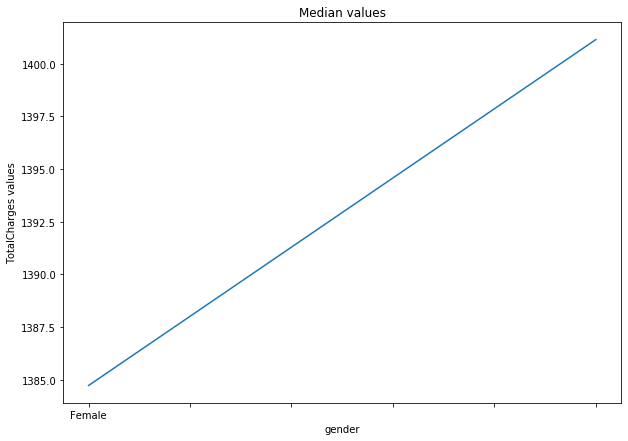

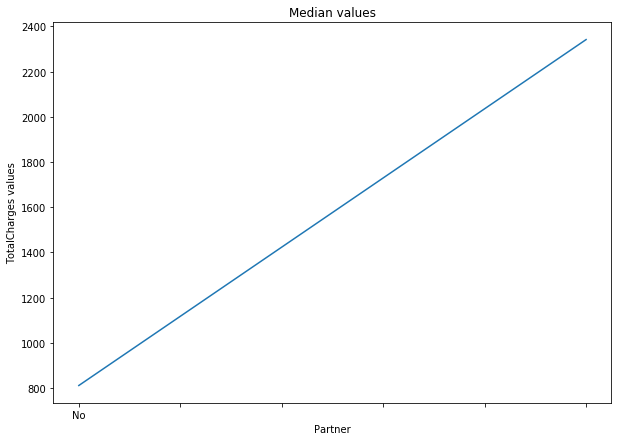

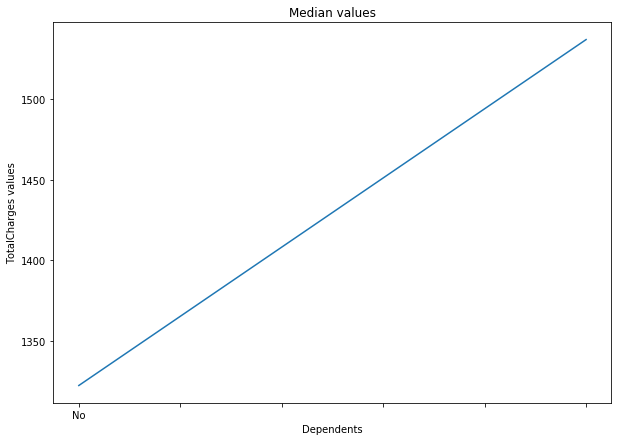

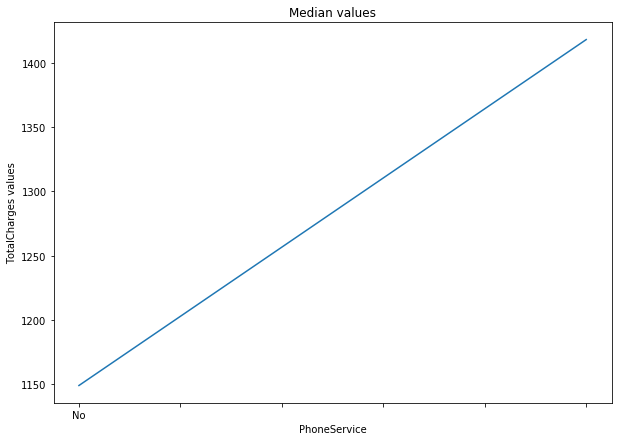

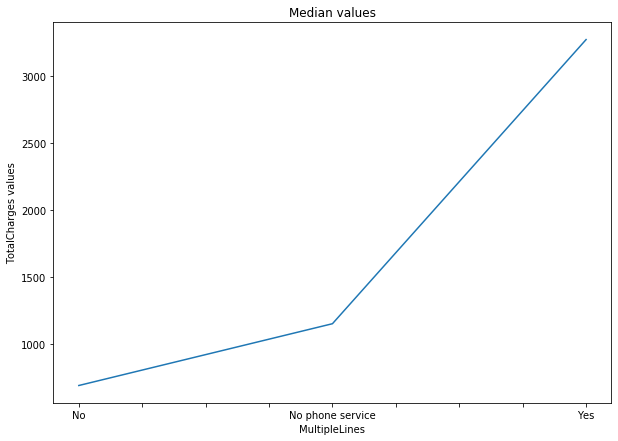

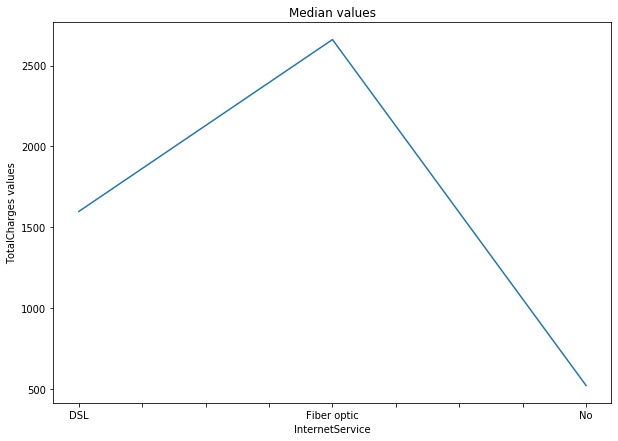

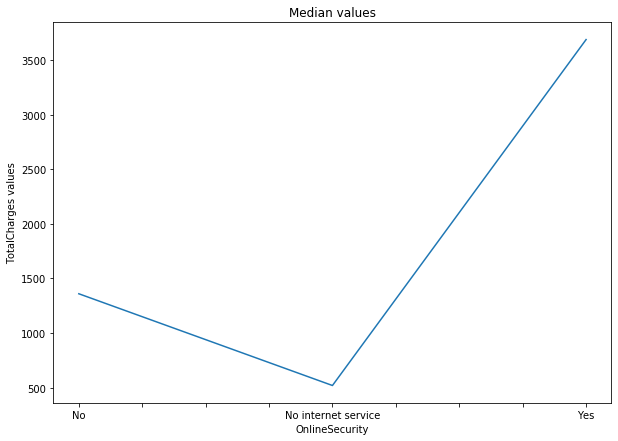

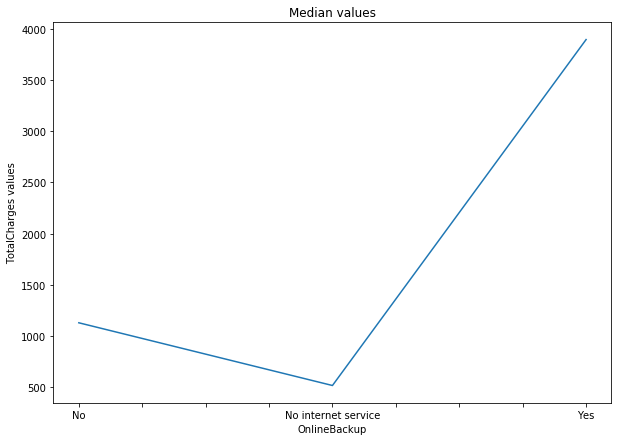

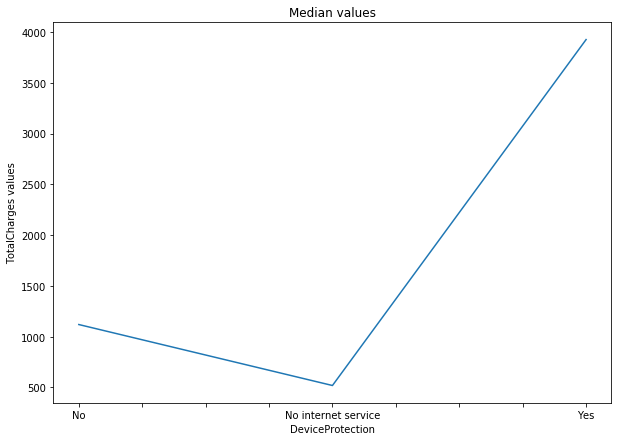

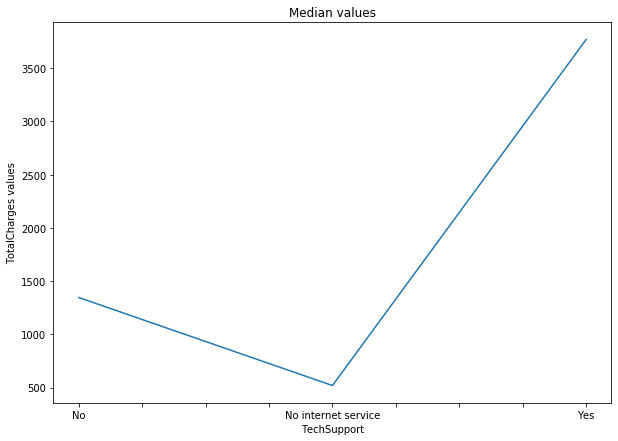

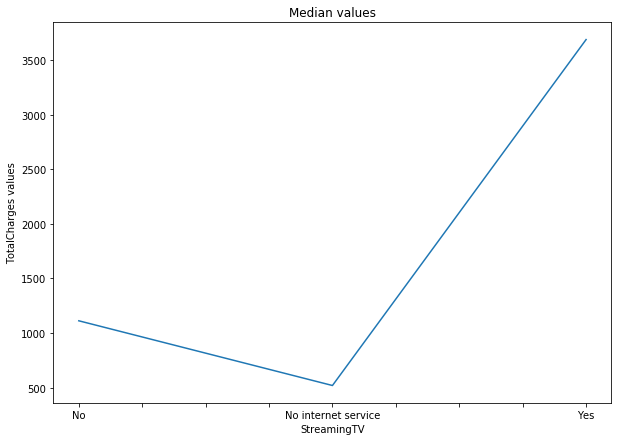

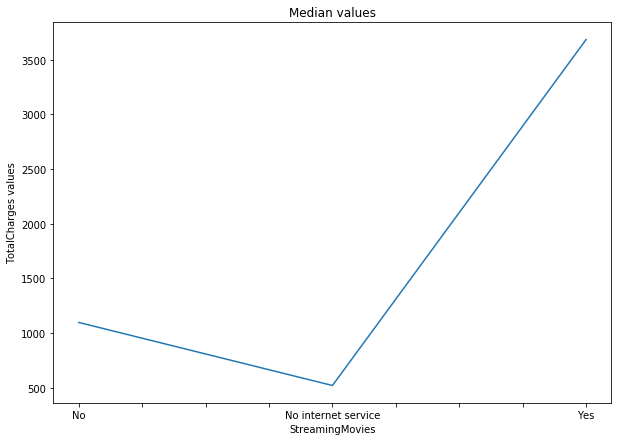

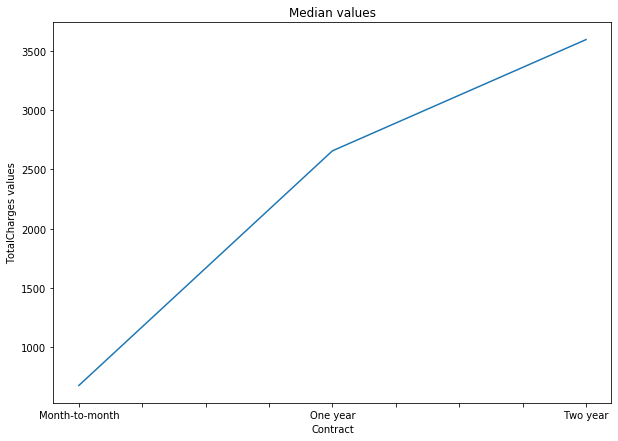

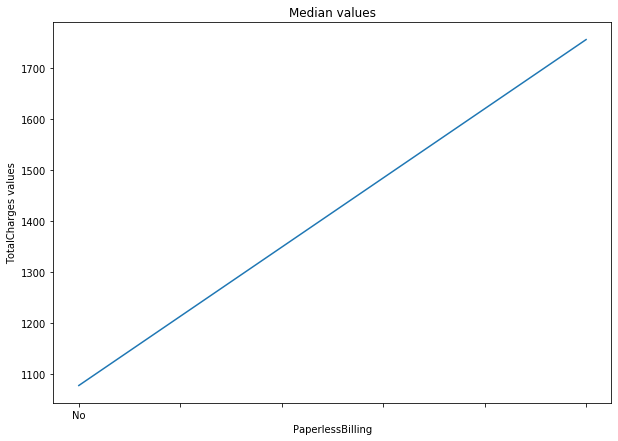

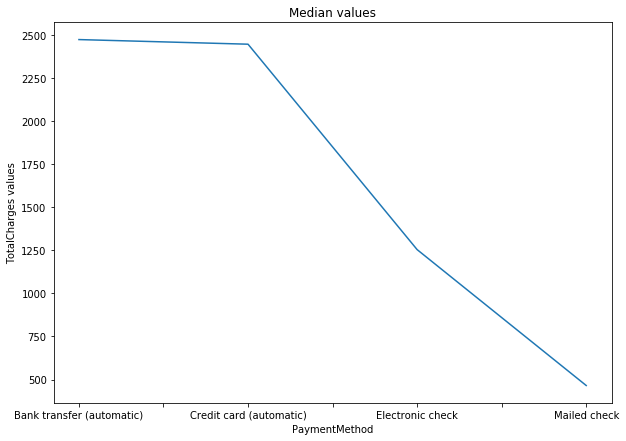

In [27]:
for var in categorical:
    plt.figure(figsize = (10, 7))
    data.groupby(var)['TotalCharges'].median().plot()
    plt.title('Median values')
    plt.ylabel('TotalCharges values')
    plt.xlabel(var)
    plt.show()

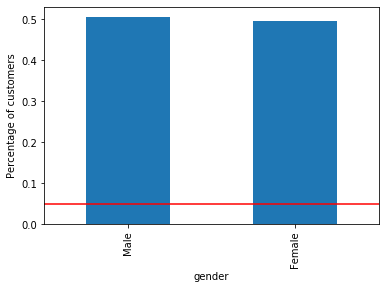

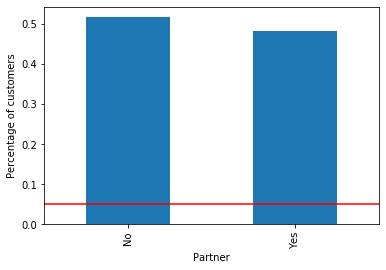

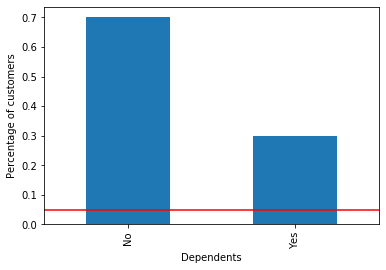

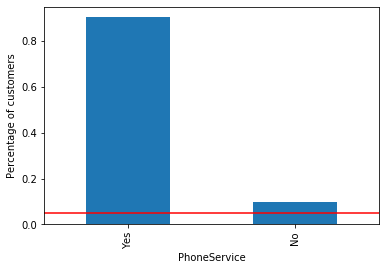

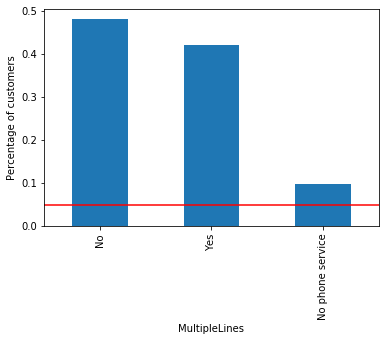

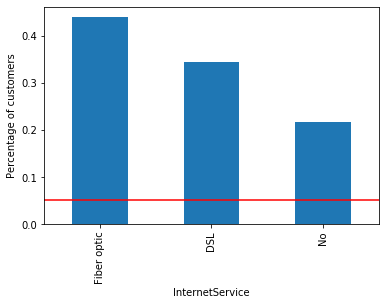

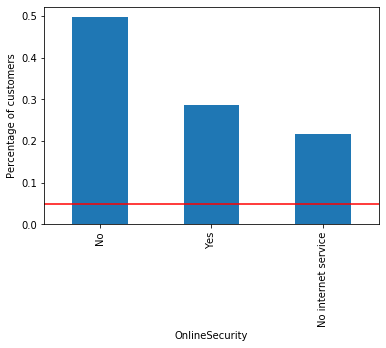

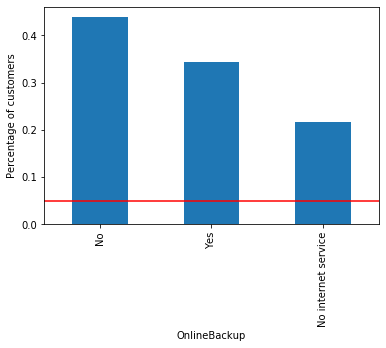

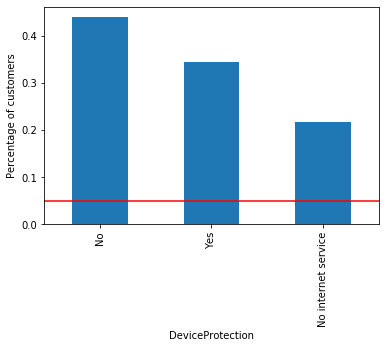

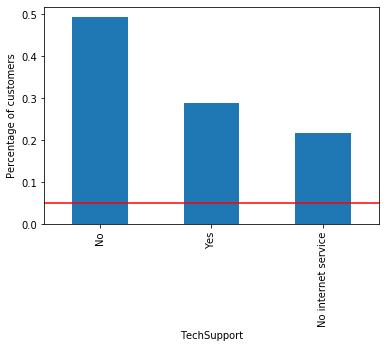

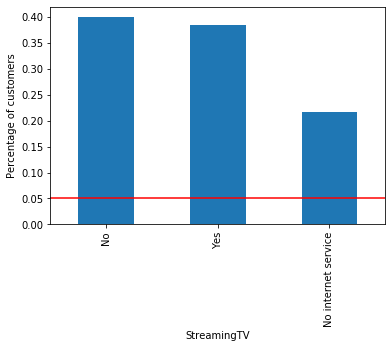

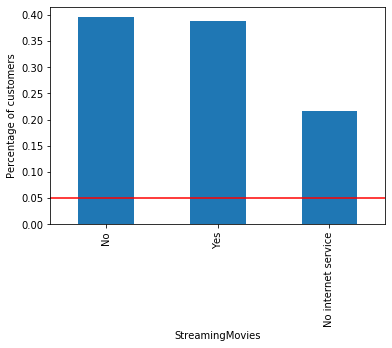

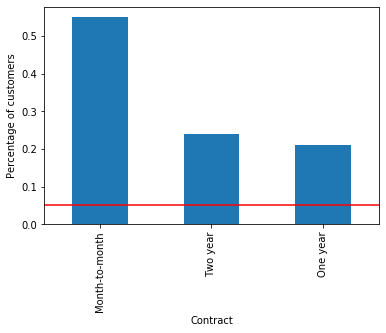

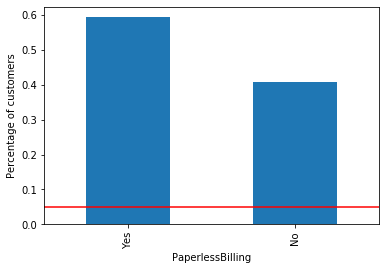

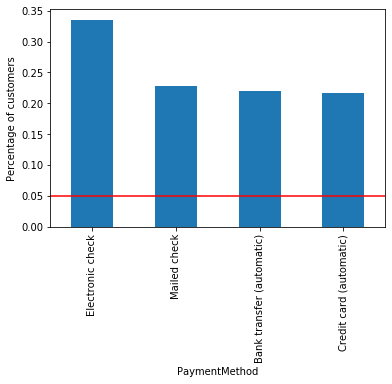

In [28]:
for var in categorical:
    totalLength = len(data)
    
    temp_df = pd.Series(data[var].value_counts() / totalLength)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(var)
    
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of customers')
    plt.show()

In [29]:
data[numerical].head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [30]:
y = data['Churn']
X = data[numerical+categorical+discrete]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape

((5634, 18), (1409, 18))

In [32]:
pipeline = Pipeline([
    ('num_impute', mdi.MeanMedianImputer(imputation_method='median', variables=numerical)),
    
    ('cat_impute', mdi.CategoricalVariableImputer(imputation_method='missing', variables=categorical)),
    
    ('cat_encode', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical)),
    
    ('scaler', StandardScaler())    
])

In [33]:
X_train.head()

,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure
2920,85.10,6155.40,Female,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,72
2966,46.35,672.70,Female,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,14
6099,24.70,1810.55,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),71
5482,73.90,2405.05,Male,Yes,Yes,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,33
2012,98.75,4533.70,Female,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,47


In [34]:
pipeline.fit(X_train, y_train)
X_train = pipeline.transform(X_train)
X_test = pipeline.transform(X_test)

In [35]:
#y_train = np.asarray(y_train)
#y_train

In [36]:
#y_test = np.asarray(y_test)

In [37]:
#y_test

In [38]:
def build_ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [39]:
classifier = KerasClassifier(build_fn=build_ann_classifier, batch_size=32, epochs=100)
classifier.fit(X_train, y_train, batch_size=32, epochs=100)

Train on 5634 samples
Epoch 1/100
5634/5634 [==============================] - ETA: 5:37 - loss: 0.6486 - accuracy: 0.59 - ETA: 1:07 - loss: 0.6403 - accuracy: 0.63 - ETA: 30s - loss: 0.6217 - accuracy: 0.6477 - ETA: 12s - loss: 0.5809 - accuracy: 0.687 - ETA: 6s - loss: 0.5446 - accuracy: 0.712 - ETA: 4s - loss: 0.5283 - accuracy: 0.72 - ETA: 2s - loss: 0.5240 - accuracy: 0.71 - ETA: 1s - loss: 0.5137 - accuracy: 0.72 - ETA: 1s - loss: 0.5062 - accuracy: 0.72 - ETA: 0s - loss: 0.4975 - accuracy: 0.73 - ETA: 0s - loss: 0.4899 - accuracy: 0.73 - ETA: 0s - loss: 0.4848 - accuracy: 0.74 - 3s 447us/sample - loss: 0.4841 - accuracy: 0.7441
Epoch 2/100
5634/5634 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.96 - ETA: 0s - loss: 0.4154 - accuracy: 0.78 - ETA: 0s - loss: 0.4415 - accuracy: 0.77 - ETA: 0s - loss: 0.4425 - accuracy: 0.77 - ETA: 0s - loss: 0.4466 - accuracy: 0.77 - ETA: 0s - loss: 0.4438 - accuracy: 0.77 - ETA: 0s - loss: 0.4422 - accuracy: 0.78 - ETA: 0

5634/5634 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.78 - ETA: 0s - loss: 0.3852 - accuracy: 0.81 - ETA: 0s - loss: 0.3955 - accuracy: 0.82 - ETA: 0s - loss: 0.3961 - accuracy: 0.81 - ETA: 0s - loss: 0.3979 - accuracy: 0.81 - ETA: 0s - loss: 0.4009 - accuracy: 0.81 - ETA: 0s - loss: 0.3972 - accuracy: 0.81 - ETA: 0s - loss: 0.3974 - accuracy: 0.81 - ETA: 0s - loss: 0.4027 - accuracy: 0.81 - ETA: 0s - loss: 0.4034 - accuracy: 0.81 - ETA: 0s - loss: 0.4022 - accuracy: 0.81 - 1s 96us/sample - loss: 0.4005 - accuracy: 0.8126
Epoch 17/100
5634/5634 [==============================] - ETA: 1s - loss: 0.5372 - accuracy: 0.75 - ETA: 0s - loss: 0.4216 - accuracy: 0.80 - ETA: 0s - loss: 0.4127 - accuracy: 0.81 - ETA: 0s - loss: 0.3961 - accuracy: 0.82 - ETA: 0s - loss: 0.3996 - accuracy: 0.81 - ETA: 0s - loss: 0.4047 - accuracy: 0.81 - ETA: 0s - loss: 0.4078 - accuracy: 0.81 - ETA: 0s - loss: 0.4057 - accuracy: 0.81 - ETA: 0s - loss: 0.3985 - accuracy: 0.81 - ETA: 0s 

Epoch 32/100
5634/5634 [==============================] - ETA: 0s - loss: 0.4635 - accuracy: 0.68 - ETA: 0s - loss: 0.4097 - accuracy: 0.79 - ETA: 0s - loss: 0.4011 - accuracy: 0.80 - ETA: 0s - loss: 0.3959 - accuracy: 0.80 - ETA: 0s - loss: 0.3916 - accuracy: 0.81 - ETA: 0s - loss: 0.3940 - accuracy: 0.80 - ETA: 0s - loss: 0.3950 - accuracy: 0.80 - ETA: 0s - loss: 0.3896 - accuracy: 0.81 - ETA: 0s - loss: 0.3855 - accuracy: 0.81 - ETA: 0s - loss: 0.3866 - accuracy: 0.81 - 0s 86us/sample - loss: 0.3860 - accuracy: 0.8163
Epoch 33/100
5634/5634 [==============================] - ETA: 0s - loss: 0.3264 - accuracy: 0.84 - ETA: 0s - loss: 0.3919 - accuracy: 0.81 - ETA: 0s - loss: 0.3895 - accuracy: 0.81 - ETA: 0s - loss: 0.3976 - accuracy: 0.81 - ETA: 0s - loss: 0.3944 - accuracy: 0.81 - ETA: 0s - loss: 0.3934 - accuracy: 0.81 - ETA: 0s - loss: 0.3946 - accuracy: 0.81 - ETA: 0s - loss: 0.3901 - accuracy: 0.81 - ETA: 0s - loss: 0.3890 - accuracy: 0.81 - ETA: 0s - loss: 0.3848 - accuracy: 0.

5634/5634 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.93 - ETA: 0s - loss: 0.3559 - accuracy: 0.82 - ETA: 0s - loss: 0.3600 - accuracy: 0.82 - ETA: 0s - loss: 0.3819 - accuracy: 0.81 - ETA: 0s - loss: 0.3847 - accuracy: 0.81 - ETA: 0s - loss: 0.3783 - accuracy: 0.81 - ETA: 0s - loss: 0.3773 - accuracy: 0.81 - ETA: 0s - loss: 0.3812 - accuracy: 0.81 - ETA: 0s - loss: 0.3787 - accuracy: 0.81 - ETA: 0s - loss: 0.3755 - accuracy: 0.82 - 0s 87us/sample - loss: 0.3759 - accuracy: 0.8204
Epoch 48/100
5634/5634 [==============================] - ETA: 1s - loss: 0.4783 - accuracy: 0.75 - ETA: 1s - loss: 0.3721 - accuracy: 0.84 - ETA: 0s - loss: 0.3999 - accuracy: 0.80 - ETA: 0s - loss: 0.3972 - accuracy: 0.81 - ETA: 0s - loss: 0.3975 - accuracy: 0.81 - ETA: 0s - loss: 0.3795 - accuracy: 0.82 - ETA: 0s - loss: 0.3898 - accuracy: 0.81 - ETA: 0s - loss: 0.3861 - accuracy: 0.81 - ETA: 0s - loss: 0.3754 - accuracy: 0.82 - ETA: 0s - loss: 0.3708 - accuracy: 0.82 - ETA: 0s 

5634/5634 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.84 - ETA: 0s - loss: 0.3950 - accuracy: 0.80 - ETA: 0s - loss: 0.3799 - accuracy: 0.80 - ETA: 0s - loss: 0.3732 - accuracy: 0.81 - ETA: 0s - loss: 0.3717 - accuracy: 0.81 - ETA: 0s - loss: 0.3723 - accuracy: 0.82 - ETA: 0s - loss: 0.3717 - accuracy: 0.82 - ETA: 0s - loss: 0.3727 - accuracy: 0.82 - ETA: 0s - loss: 0.3751 - accuracy: 0.82 - ETA: 0s - loss: 0.3744 - accuracy: 0.82 - ETA: 0s - loss: 0.3723 - accuracy: 0.81 - 1s 100us/sample - loss: 0.3709 - accuracy: 0.8216
Epoch 62/100
5634/5634 [==============================] - ETA: 0s - loss: 0.3575 - accuracy: 0.87 - ETA: 0s - loss: 0.4097 - accuracy: 0.80 - ETA: 0s - loss: 0.3787 - accuracy: 0.81 - ETA: 0s - loss: 0.3639 - accuracy: 0.82 - ETA: 0s - loss: 0.3653 - accuracy: 0.82 - ETA: 0s - loss: 0.3617 - accuracy: 0.82 - ETA: 0s - loss: 0.3693 - accuracy: 0.82 - ETA: 0s - loss: 0.3712 - accuracy: 0.82 - ETA: 0s - loss: 0.3730 - accuracy: 0.82 - 0s 79us

5634/5634 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.87 - ETA: 0s - loss: 0.3552 - accuracy: 0.83 - ETA: 0s - loss: 0.3752 - accuracy: 0.82 - ETA: 0s - loss: 0.3578 - accuracy: 0.83 - ETA: 0s - loss: 0.3608 - accuracy: 0.83 - ETA: 0s - loss: 0.3670 - accuracy: 0.83 - ETA: 0s - loss: 0.3679 - accuracy: 0.82 - ETA: 0s - loss: 0.3645 - accuracy: 0.82 - ETA: 0s - loss: 0.3642 - accuracy: 0.82 - 0s 81us/sample - loss: 0.3641 - accuracy: 0.8273
Epoch 78/100
5634/5634 [==============================] - ETA: 1s - loss: 0.4492 - accuracy: 0.78 - ETA: 0s - loss: 0.3594 - accuracy: 0.83 - ETA: 0s - loss: 0.3727 - accuracy: 0.82 - ETA: 0s - loss: 0.3622 - accuracy: 0.82 - ETA: 0s - loss: 0.3655 - accuracy: 0.81 - ETA: 0s - loss: 0.3571 - accuracy: 0.82 - ETA: 0s - loss: 0.3549 - accuracy: 0.83 - ETA: 0s - loss: 0.3613 - accuracy: 0.82 - ETA: 0s - loss: 0.3624 - accuracy: 0.82 - ETA: 0s - loss: 0.3639 - accuracy: 0.82 - 1s 90us/sample - loss: 0.3647 - accuracy: 0.8285
E

5634/5634 [==============================] - ETA: 0s - loss: 0.3732 - accuracy: 0.81 - ETA: 0s - loss: 0.3350 - accuracy: 0.84 - ETA: 0s - loss: 0.3478 - accuracy: 0.83 - ETA: 0s - loss: 0.3497 - accuracy: 0.83 - ETA: 0s - loss: 0.3594 - accuracy: 0.82 - ETA: 0s - loss: 0.3650 - accuracy: 0.82 - ETA: 0s - loss: 0.3654 - accuracy: 0.82 - ETA: 0s - loss: 0.3611 - accuracy: 0.82 - ETA: 0s - loss: 0.3607 - accuracy: 0.82 - ETA: 0s - loss: 0.3593 - accuracy: 0.82 - 0s 88us/sample - loss: 0.3583 - accuracy: 0.8291
Epoch 94/100
5634/5634 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.81 - ETA: 0s - loss: 0.3496 - accuracy: 0.84 - ETA: 0s - loss: 0.3442 - accuracy: 0.84 - ETA: 0s - loss: 0.3406 - accuracy: 0.84 - ETA: 0s - loss: 0.3475 - accuracy: 0.83 - ETA: 0s - loss: 0.3481 - accuracy: 0.83 - ETA: 0s - loss: 0.3511 - accuracy: 0.83 - ETA: 0s - loss: 0.3560 - accuracy: 0.83 - ETA: 0s - loss: 0.3562 - accuracy: 0.83 - 0s 80us/sample - loss: 0.3582 - accuracy: 0.8294
E

In [40]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: Churn, Length: 1409, dtype: int64

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred))
print('/n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1041
           1       0.56      0.55      0.55       368

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

/n
[[885 156]
 [167 201]]


In [44]:
pred_proba = classifier.predict_proba(X_test)[:, 1]
pred_proba

array([0.10402653, 0.2571448 , 0.16617677, ..., 0.25582945, 0.33772206,
       0.70996475], dtype=float32)

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

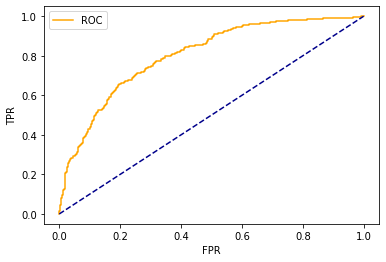

In [47]:
plot_roc_curve(fpr, tpr)

In [48]:
print(roc_auc_score(y_test, pred_proba))

0.8020324311907447
